<a href="https://colab.research.google.com/github/itsmesudhanshu/Coronavirussentiment/blob/main/Coronavirus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Coronavirus Tweet Sentiment Analysis**
##Project Type - Classification
##Contribution - Team
### Team member 1 : Sudhanshu Chouhan
### Team member 2 : Kapil Narayan Singh













Import libraries

In [102]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix as cm  
from sklearn.metrics import classification_report as cr  
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.utils import shuffle
import pylab as p



In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
data= pd.read_csv('/content/drive/MyDrive/coronavirus sentiment/Coronavirus Tweets.csv', encoding="ISO-8859-1")

     

# Dataset First View

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [106]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [107]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


##Dataset Rows and Columns count

In [108]:
data.shape

(41157, 6)

## Dataset Information

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


## Duplicate Values

In [110]:
data.duplicated().sum()

0

##Missing Values/Null Values Count

In [111]:
data.isna().sum().sort_values(ascending = False).head()

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
dtype: int64

<AxesSubplot:>

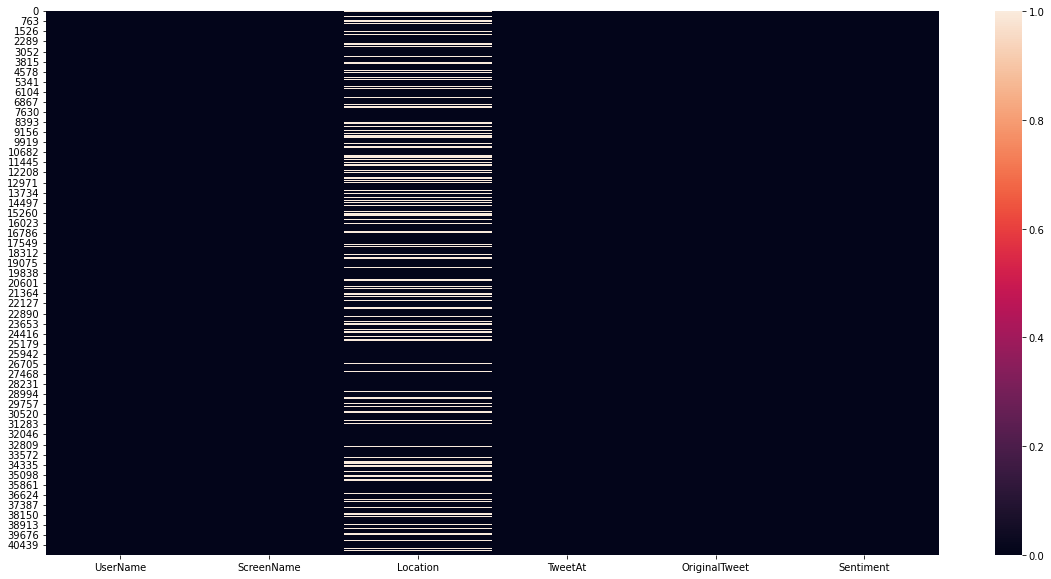

In [112]:
# let's plot a Heatmap to check the Nan values
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

## Knowing Dataset

##2.Understanding Variables

In [113]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [114]:
data.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


Variable Description
1.Username is Coded Username

2.ScreenName is Coded Screen name

3.Location is Region of origin of tweet.

4.Tweet at is Tweet timing.

5.OriginalTweet is First tweet in the thread.

6.Sentiment which is target Variable.

##Checking Unique values for each Variables.

In [115]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [116]:
data.Location.nunique()

12220

From this we get to know that unique value is relevant for only sentiment column or target variable.

#Data Wrangling

##Data Wrangling Code

In [117]:
# Plot for Percentage of data from different locations
def data_source(feature, title, df, size):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()
     

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


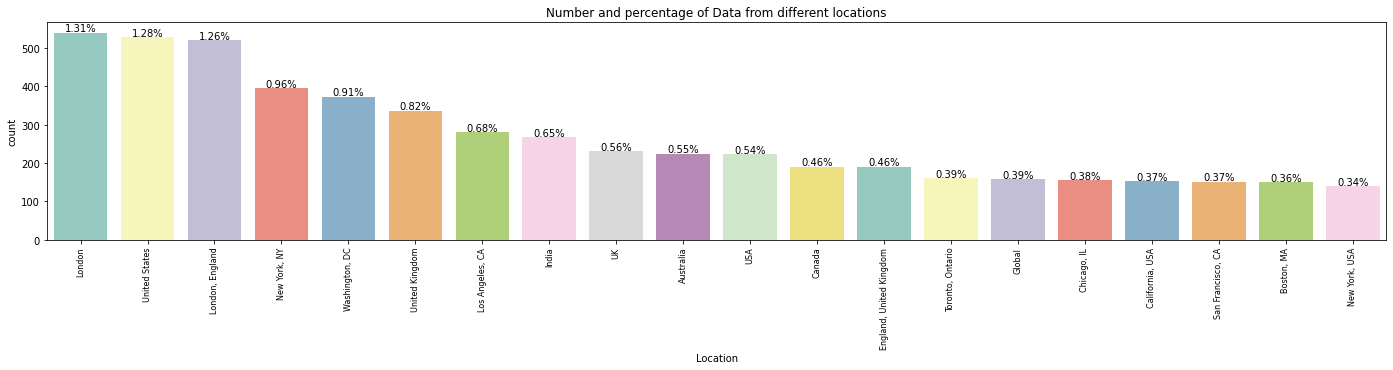

In [118]:
# Percentage of data from different locations
data_source("Location", "Data from different locations", data, 6)
     

The above observation shows that the number of data percentage wise from each country that of total data present.

In [119]:

# Plot unique value across different colums
def unique_values(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['Features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['Uniques'] = uniques
    return unique_dataframe
     

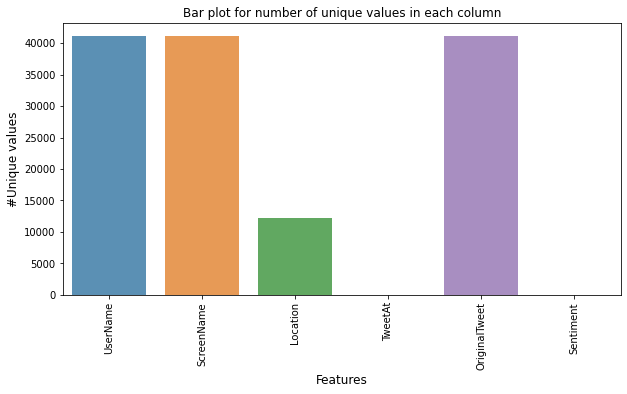

In [120]:
unique_data = unique_values(data)
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.barplot(x=unique_data['Features'], y=unique_data['Uniques'], alpha=0.8)
plt.title('Bar plot for number of unique values in each column')
plt.ylabel('#Unique values', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

The number of unique value in different feature are as followed Username , ScreenName , OriginalTweet has unique values of around 40000 then followed by Location that is between 10000-15000. 

#Sample text of Sentiment.

In [121]:
data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

##Here we can see that the number of positive sentiment is highest.

In [122]:
data[data['Sentiment'] == 'Neutral']['OriginalTweet'].sample(10)

27309    #Coronavirus effect: India's property prices l...
9338     Sainsbury's and Asda limit sales of all food i...
20060    @narendramodi sir it's nice about 21 days lock...
11335    Trump told states to buy their own medical sup...
29221    In the aftermath of the Covid-19 pandemic and ...
36752    Check out my latest article: Make Online Shopp...
39489    Does anyone believe that post COVID 19 we will...
39956    How will the pandemic affect Scottish house pr...
22747    UK has bought 3.5 million coronavirus antibody...
28695               4 Sources Mylan Lab s Hydroxycoroquine
Name: OriginalTweet, dtype: object

In [123]:
data[data['Sentiment'] == 'Extremely Positive']['OriginalTweet'].sample(10)

23743    Grocery store employees should also have easy ...
41148    UV light Sterilizer Sanitizer for your mask an...
29174    A surprising biproduct of #socialdistancing is...
39401    What to Know Now About Masks and Coronavirus -...
25110    As we take stock of the possible reasons behin...
11768    IMPORTANT NOTICE Â COVID 19 Â TEMPORARY CLOS...
17756    Happy #Monday!  May your minds be full of crea...
22099    Wow, Aetna just announced that their policyhol...
12041    Man Utd and Man City have donated a combined  ...
18451    Found my secret stash of #ToiletPaper for anyo...
Name: OriginalTweet, dtype: object

In [124]:
data[data['Sentiment'] == 'Positive']['OriginalTweet'].sample(10)

5967     Motherboard There Are Two Types of People Now ...
35582    Happy Quarantine Birthday Cake Cake Decoration...
28129    One thing to take away from this pandemic is h...
35610    Was in line yesterday watching a worker in PPE...
13837    Our retail store will be closed until the covi...
33000    Homemade hand sanitizer:\r\r\n\r\r\nhttps://t....
26217    The EU-spec SPP rose in the week ending 28 Mar...
24049    Game of Bowls S1 EP.1 ? #quarantine #stayhome ...
5588     Retailers grocery stores offering shopping hou...
15213    AmazonÂs Black Market: Reviews https://t.co/j...
Name: OriginalTweet, dtype: object

In [125]:
data[data['Sentiment'] == 'Extremely Negative']['OriginalTweet'].sample(10)

22340    The COVID 19 pandemic and a Russian Saudi pric...
15898    YO pay UR loyal employees sick paid Do you idi...
6407     If your Queuing to get on a supermarket car pa...
3671     As the COVID-19 spreads across the U.S., threa...
14799    Listen up the U K food manufacturers can crank...
21583    All countries that have been financially sanct...
32832    the most affected were forced to revert to neg...
10254    @susannareid100 Yet also there's still shamele...
2868     As COVID-19 spreads across the US, threatening...
32837    Why are so many people buying toilet paper dur...
Name: OriginalTweet, dtype: object

In [126]:
data[data['Sentiment'] == 'Negative']['OriginalTweet'].sample(10)

2046     Kyiv city council announced that it wonÂt let...
14849    Saudis are battling on 3 fronts Yemen Covid 19...
31341    @MindBodySchool Agree. COVID-19 was a trigger ...
6182     @ohtobekay Hi there, we strongly condemn price...
33708    Chapter Something of the DAMN #coronavirus Why...
16141    Allende had the misfortune of confronting a bu...
529      Markets tank globally. I think trading should ...
33565    Don't believe what this douchebag says about h...
15194                  Beware of scams related to COVID 19
18897    @VeritasVital Wondering if we are being brainw...
Name: OriginalTweet, dtype: object

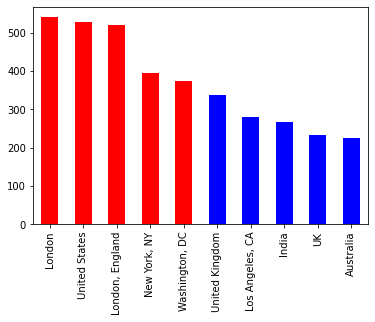

In [127]:
from matplotlib.figure import figaspect
country_location = data['Location'].value_counts().index

colors_location = ['red' if (x in country_location[:5]) else 'blue' for x in country_location]


data['Location'].value_counts()[0:10].plot(kind='bar',alpha =1,color=colors_location);


In [128]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
import neattext.functions as nfx

In [130]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [131]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_urls)


In [132]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
23014,"Perth startup, The Uno Group &amp; Co, special...","Perth startup, The Uno Group &amp; Co, special..."
24585,Hackers are taking advantage of heightened con...,Hackers are taking advantage of heightened con...
35070,ÂAll hands on deckÂ: Grocery store executive...,ÂAll hands on deckÂ: Grocery store executive...
9801,.@mcorkery5 @yaffebellany @rachelwharton Scare...,.@mcorkery5 @yaffebellany @rachelwharton Scare...
32875,COVID-19: Lagos markets record drop in prices ...,COVID-19: Lagos markets record drop in prices ...
30682,"This is serious, folks. #Covid_19\r\r\n#StayHo...","This is serious, folks. #Covid_19\r\r\n#StayHo..."
26292,After announcing special hours for seniors to ...,After announcing special hours for seniors to ...
17741,I spoke with student reporters at about why pe...,I spoke with student reporters at about why pe...
2528,Australia to be worse than Italy on #Covid-19....,Australia to be worse than Italy on #Covid-19....
31401,Even though the producers of OPEC have gone ah...,Even though the producers of OPEC have gone ah...


In [133]:
data['neat_tweet'] = data['OriginalTweet'].apply(nfx.remove_numbers)

In [134]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
37249,"Humana, a national health care company, has an...","Humana, a national health care company, has an..."
37469,"Almost at the end of week 3, and I was wonderi...","Almost at the end of week , and I was wonderin..."
38608,WTH are people doing with all the #toiletpaper...,WTH are people doing with all the #toiletpaper...
23497,Highlights - IMCO calls for further action to ...,Highlights - IMCO calls for further action to ...
34094,Internet shopping and home deliveries are fast...,Internet shopping and home deliveries are fast...
27147,The fact that we are debating paying essential...,The fact that we are debating paying essential...
35973,??Scam Alert??\r\r\n\r\r\nIf you notice a scam...,??Scam Alert??\r\r\n\r\r\nIf you notice a scam...
15774,S/o to everyone in the grocery store wearing g...,S/o to everyone in the grocery store wearing g...
20392,What a kind gesture Mr Rafiq owner of Pak Cont...,What a kind gesture Mr Rafiq owner of Pak Cont...
7563,The UK's biggest supermarket has become the la...,The UK's biggest supermarket has become the la...


In [135]:
data['neat_tweet'] = data['OriginalTweet'].str.lower()

In [136]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
14697,Manchester City and Manchester United have don...,manchester city and manchester united have don...
15875,What I've learned from the #coronavirus:\r\r\n...,what i've learned from the #coronavirus:\r\r\n...
19866,My 1st day off work &amp; this COVID-19 is alr...,my 1st day off work &amp; this covid-19 is alr...
13796,"Tonight as we started clapping, the local sup...","tonight as we started clapping, the local sup..."
37075,The person is a Cumberland County resident and...,the person is a cumberland county resident and...
4760,Am I at the supermarket or ikea? I donÂt know...,am i at the supermarket or ikea? i donât know...
22319,Slum Areas of metro cities where people are de...,slum areas of metro cities where people are de...
20833,the 2 Rolls parody played earlier on,the 2 rolls parody played earlier on
14927,Don t forget to thoroughly wash your hands bef...,don t forget to thoroughly wash your hands bef...
21290,Top News: How to Avoid COVID-19 at the Superma...,top news: how to avoid covid-19 at the superma...


In [137]:
 data['extracted_hashtags']=data['OriginalTweet'].apply(nfx.extract_hashtags)

In [138]:
data.loc[:,['OriginalTweet','extracted_hashtags']].sample(10)

,OriginalTweet,extracted_hashtags
7865,ÂThe Government must urgently consider offeri...,[#COVID-19]
26154,Young Chop Presses Crip About Pop Smoke At Sup...,"[#rap, #hiphop, #viral, #trending, #worldstar,..."
39731,@NajamSethiShow Dear sethi sb \r\r\nPls have t...,[#Covid_19]
25728,Wam Dubai Economy has launched a Price Moni...,[]
27357,CIGARS ARE ESSENTIAL...Cutters' cigar retail s...,[]
24345,Fucking idiot!! #GeorgeFalcone #COVID2019 #cor...,"[#GeorgeFalcone, #COVID2019, #coronavirus]"
5340,i hope all those nasty stank ass raunchy dutty...,[]
1589,When I'm pissed my reading comprehension ain't...,"[#NeverBiden, #BigPharma, #COVID2019, #BernieF..."
35882,@DCACatEX writes on the daily impact on consum...,"[#COVID-19,]"
6538,Friend in Australia Queensland was just in the...,[]


In [139]:
data['neat_tweet']=data['OriginalTweet'].apply(nfx.remove_hashtags)

In [140]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
15006,In position for the #coronavirus briefing w @p...,"In position for the briefing w @potus @vp , ..."
23589,If you can t get your hands on rubbing alcohol...,If you can t get your hands on rubbing alcohol...
27677,Proof that RCMP are so out of touch with other...,Proof that RCMP are so out of touch with other...
21777,Here is a bottle of hand sanitizer made by a l...,Here is a bottle of hand sanitizer made by a l...
29623,So true in this #lockdown period. \r\r\n\r\r\n...,"So true in this period. \r\r\n\r\r\n""The wor..."
29935,Follow that truck\r\r\nSerious #ToiletPaper #M...,Follow that truck\r\r\nSerious \r\r\n \r\...
5095,Because coronavirus is transmitted via droplet...,Because coronavirus is transmitted via droplet...
2118,"Scott Clarke, Consumer Products Industry Lead,...","Scott Clarke, Consumer Products Industry Lead,..."
2761,Australian Prime Minister has warned people to...,Australian Prime Minister has warned people to...
5553,Always check the sanitizerÂs label to make su...,Always check the sanitizerÂs label to make su...


In [141]:
data['neat_tweet']=data['neat_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [142]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
19772,"For understandable reasons, there is much comm...","For understandable reasons, there is much comm..."
36055,COO Mushtaque Ahmed discusses the wholesaler s...,COO Mushtaque Ahmed discusses the wholesaler s...
10069,A trip to the supermarket has never seemed so ...,A trip to the supermarket has never seemed so ...
33330,Multi-notch downgrades of sovereign ratings ar...,Multi-notch downgrades of sovereign ratings ar...
26690,Large non essential corporate retail stores th...,Large non essential corporate retail stores th...
15255,IÂd hate to think the President is so cynical...,IÂd hate to think the President is so cynical...
24230,COVID-19: Government should promote online sho...,COVID-19: Government should promote online sho...
39819,"Downtown main street retail, restaurants &amp;...","Downtown main street retail, restaurants &amp;..."
36774,"The United States is the world's superpower, b...","The United States is the world's superpower, b..."
15567,#NationalDayOfPrayer for all the covid-19 pati...,"for all the covid-19 patients, our brave and..."


In [143]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_multiple_spaces)

In [144]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_urls)

In [145]:
data['neat_tweet']=data['neat_tweet'].apply(nfx.remove_puncts)

In [146]:
data.loc[:,['OriginalTweet','neat_tweet']].sample(10)

,OriginalTweet,neat_tweet
25899,Three global agencies warned of the risk of a ...,Three global agencies warned of the risk of a ...
22905,The #coronavirus has renewed the potential for...,The has renewed the potential for my brilliant...
37093,A hand written sign in the window of a truck n...,A hand written sign in the window of a truck n...
5121,Every job has its purpose in contributing to t...,Every job has its purpose in contributing to t...
30674,As we abide by social distancing guidelines to...,As we abide by social distancing guidelines to...
3780,Is it just me that ever since all this uncerta...,Is it just me that ever since all this uncerta...
38837,Smithfield Foods said it will idle its Sioux F...,Smithfield Foods said it will idle its Sioux F...
36302,Watch this Interesting webinar on #COVID Lock...,Watch this Interesting webinar on Lockdown 5 ...
30533,UK consumer confidence has shown its biggest f...,UK consumer confidence has shown its biggest f...
30040,Minister Didiza pleads with the public not to ...,Minister Didiza pleads with the public not to ...


In [147]:
data['neat_tweet'] = data['neat_tweet'].apply(lambda x: nfx.remove_stopwords(x,lang='en'))

#**Tokenization**

In [148]:
tokenized_tweet = data['neat_tweet'].apply(lambda x: x.split())

In [149]:
tokenized_tweet.sample(3)

16460    [Crazy, Orders:, Malaysian, Army, Helped, Spre...
1772     [aisles, BrookshireÂs, grocery, store, Bullar...
33619    [concerns, spread, COVID19, increase, prices, ...
Name: neat_tweet, dtype: object

In [150]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [151]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [152]:
data['neat_tweet'] = tokenized_tweet

#**Wordplay**

In [153]:
from wordcloud import WordCloud
import wikipedia
from PIL import Imagesto

In [154]:
all_words = ' '.join(text for text in data['neat_tweet'])

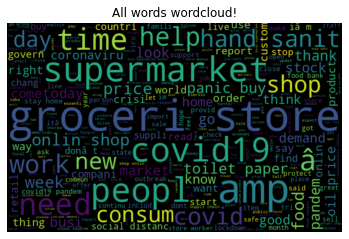

In [200]:
all_words_cloud = WordCloud(width=800, height=500, max_font_size=200,max_words=300).generate(all_words)

plt.title('All words wordcloud!')
plt.imshow(all_words_cloud, interpolation="bilinear")
plt.axis('off');

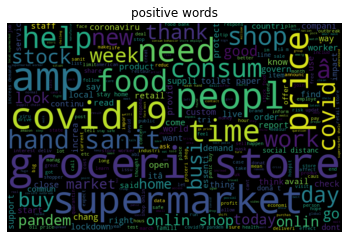

In [214]:
positive_words = ' '.join(text for text in data[data['Sentiment']=='Positive']['neat_tweet'])


positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(positive_words)

plt.title('positive words')
plt.imshow(positive_words_cloud, interpolation="bilinear")
plt.axis('off');

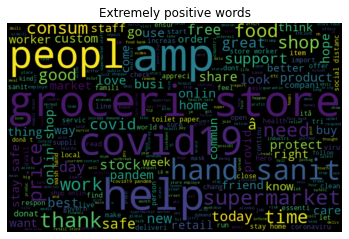

In [216]:
extremly_positive_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Positive']['neat_tweet'])


extremly_positive_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_positive_words)

plt.title('Extremely positive words')
plt.imshow(extremly_positive_words_cloud, interpolation="bilinear")
plt.axis('off');

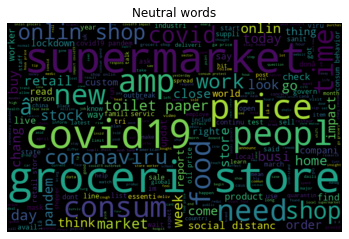

In [158]:
neutral_words = ' '.join(text for text in data[data['Sentiment']=='Neutral']['neat_tweet'])


neutral_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(neutral_words)

plt.title('Neutral words')
plt.imshow(neutral_words_cloud, interpolation="bilinear")
plt.axis('off');

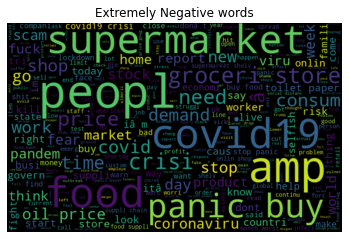

In [159]:
extremly_negative_words = ' '.join(text for text in data[data['Sentiment']=='Extremely Negative']['neat_tweet'])


extremly_negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(extremly_negative_words)

plt.title('Extremely Negative words')
plt.imshow(extremly_negative_words_cloud, interpolation="bilinear")
plt.axis('off');

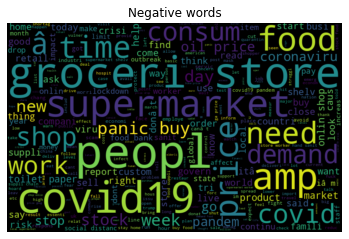

In [160]:
negative_words = ' '.join(text for text in data[data['Sentiment']=='Negative']['neat_tweet'])


negative_words_cloud = WordCloud(width=800, height=500, max_font_size=110,max_words=300).generate(negative_words)

plt.title('Negative words')
plt.imshow(negative_words_cloud, interpolation="bilinear")
plt.axis('off');

In [161]:
data.drop(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet'],axis =1,inplace=True)

In [162]:
X = data['neat_tweet']
y = data['Sentiment']

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [164]:
print(f'train shape { X_train.shape} and { y_train.shape} ')
print(f'test shape { X_test.shape} and { y_test.shape} ')

train shape (32925,) and (32925,) 
test shape (8232,) and (8232,) 


In [165]:
data['neat_tweet'].isnull().sum()

0

In [166]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [170]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [171]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.7000151860288535
Validation accuracy Score :  0.46379980563654033
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.62      0.46       655
Extremely Positive       0.41      0.59      0.49       936
          Negative       0.51      0.42      0.46      2416
           Neutral       0.29      0.67      0.40       670
          Positive       0.61      0.39      0.48      3555

          accuracy                           0.46      8232
         macro avg       0.44      0.54      0.46      8232
      weighted avg       0.52      0.46      0.47      8232



In [172]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
print(train_accuracy[i]) 
print(test_accuracy[i] )

0.3136826119969628
0.2597181729834791


In [215]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score   : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score   :  0.9389825360668185
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2834
           1       0.92      0.87      0.89      5398

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



In [197]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier(tree_method='hist')

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.8503568716780562
Validation accuracy Score :  0.8141399416909622
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      2315
           1       0.93      0.81      0.86      5917

    accuracy                           0.81      8232
   macro avg       0.78      0.82      0.79      8232
weighted avg       0.84      0.81      0.82      8232



In [175]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.9042672741078208
Validation accuracy Score :  0.6020408163265306
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.76      0.59       693
Extremely Positive       0.51      0.78      0.62       866
          Negative       0.56      0.54      0.55      2073
           Neutral       0.73      0.65      0.69      1732
          Positive       0.66      0.53      0.59      2868

          accuracy                           0.60      8232
         macro avg       0.59      0.65      0.61      8232
      weighted avg       0.62      0.60      0.60      8232



In [198]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9406226271829916
Validation accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2732
           1       0.92      0.87      0.89      5500

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [199]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
               'Naive Bayes', 
              'Stochastic Gradient Decent','xgboost',],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
               NB_accuracy, 
              sgd_accuracy,xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
3,Stochastic Gradient Decent,0.865282
1,Logistic Regression,0.862366
0,Support Vector Machines,0.840015
4,xgboost,0.814140
2,Naive Bayes,0.790938


In [179]:
data_bin = data.copy()

In [180]:
data_bin['Sentiment'] = data_bin['Sentiment'].apply(lambda x: 1 if (x=='Positive' or x== 'Extremely Positive' or x== 'Neutral' ) else 0)

In [181]:
data_bin['Sentiment'].value_counts()

1    25759
0    15398
Name: Sentiment, dtype: int64

In [182]:
X= data_bin['neat_tweet']
y = data_bin['Sentiment']

In [183]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = data.Sentiment.values)

In [185]:
vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform(X_test.values)

In [186]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("Training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Test accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

Training accuracy Score    :  0.8680030372057707
Test accuracy Score :  0.7909378036929058
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      2758
           1       0.86      0.81      0.84      5474

    accuracy                           0.79      8232
   macro avg       0.77      0.78      0.77      8232
weighted avg       0.80      0.79      0.79      8232



In [187]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Test accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  0.9997266514806378
Test accuracy Score :  0.8259232264334305
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      2662
           1       0.90      0.83      0.87      5570

    accuracy                           0.83      8232
   macro avg       0.80      0.82      0.81      8232
weighted avg       0.84      0.83      0.83      8232



In [188]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Test accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9406226271829916
Test accuracy Score :  0.8623663751214772
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      2732
           1       0.92      0.87      0.89      5500

    accuracy                           0.86      8232
   macro avg       0.84      0.86      0.85      8232
weighted avg       0.87      0.86      0.86      8232



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Test accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.8503568716780562
Test accuracy Score :  0.8137755102040817
              precision    recall  f1-score   support

           0       0.63      0.83      0.72      2314
           1       0.93      0.81      0.86      5918

    accuracy                           0.81      8232
   macro avg       0.78      0.82      0.79      8232
weighted avg       0.84      0.81      0.82      8232



In [190]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_test))

Training accuracy Score    :  0.958663629460896
Validation accuracy Score :  0.8400145772594753
              precision    recall  f1-score   support

           0       0.69      0.86      0.76      2462
           1       0.93      0.83      0.88      5770

    accuracy                           0.84      8232
   macro avg       0.81      0.85      0.82      8232
weighted avg       0.86      0.84      0.84      8232



In [191]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9389825360668185
Validation accuracy Score :  0.8652818270165209
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      2834
           1       0.92      0.87      0.89      5398

    accuracy                           0.87      8232
   macro avg       0.85      0.86      0.85      8232
weighted avg       0.87      0.87      0.87      8232



In [192]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
4,Stochastic Gradient Decent,0.865282
1,Logistic Regression,0.862366
0,Support Vector Machines,0.840015
2,Random Forest,0.825923
5,XGBoost,0.813776
3,Naive Bayes,0.790938


In [194]:
 from sklearn.metrics import confusion_matrix

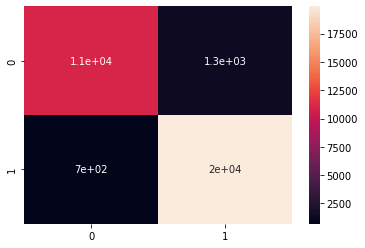

In [195]:
# Confusion matrix for training set with SGDclassifier
train_preds = sgd_clf.predict(X_train)
sns.heatmap(confusion_matrix(y_train,train_preds),annot= True);

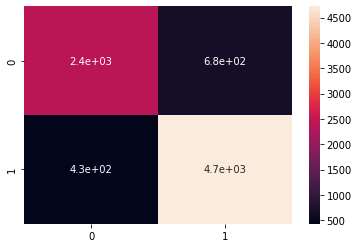

In [196]:
sns.heatmap(confusion_matrix(y_test,sgd_prediction),annot= True);